<a href="https://colab.research.google.com/github/he-yilan/COVID19_HousholdSizeModeling/blob/master/ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agent-Based Simulation of COVID-19 Health and Economical Effects
Source:
Prof. Dr. Petrônio Cândido de Lima e Silva (petronio.candido@ifnmg.edu.br) Experiments for the post published on Towards Data Science, available at https://towardsdatascience.com/agent-based-simulation-of-covid-19-health-and-economical-effects-6aa4ae0ff397

##Installing the package

In [ ]:
!pip3 install git+https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git

  Cloning https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git to /tmp/pip-req-build-ucrfumzp
  Running command git clone -q https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git /tmp/pip-req-build-ucrfumzp
  Created wheel for covid-abs: filename=covid_abs-0.0.2-cp36-none-any.whl size=31401 sha256=5806934b00aa08ff75d6ceeb94d476782e34a62d3bae5aa69b3d89f8253d6780
  Stored in directory: /tmp/pip-ephem-wheel-cache-nt5cpggv/wheels/2c/f2/e5/b19523185aa537b4a85e38a764488fbf9f1a0d778647925527
Successfully built covid-abs


##Common imports

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Simulations

###July 1 to July 21, 2020
Sources: <br>
https://data.worldbank.org/indicator/SP.POP.TOTL?locations=US <br>
https://www.worldometers.info/coronavirus/country/us/ <br>
https://www.citypopulation.de/en/world/bymap/LandArea.html <br>
https://sccm.org/Blog/March-2020/United-States-Resource-Availability-for-COVID-19

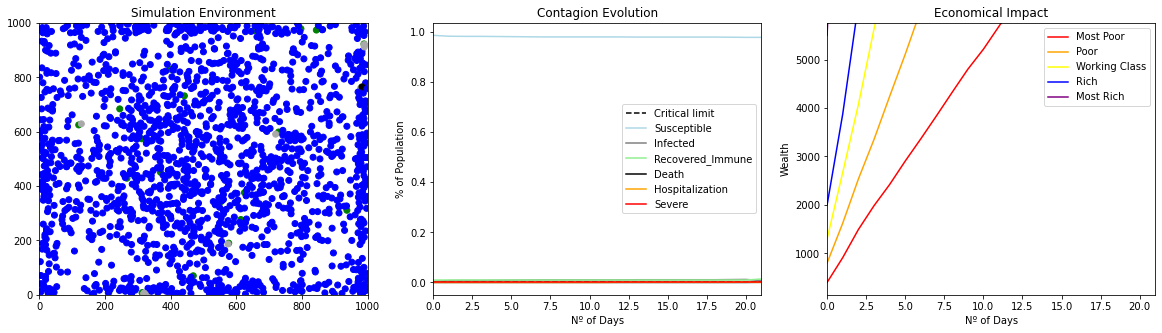

In [ ]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    #Percentage of infected in initial population
    initial_infected_perc = 0.00445702877, #1462973/328239523
    #Percentage of immune in initial population
    initial_immune_perc = 0.01, 
    #Length of simulation environment
    length = 1000,
    #Height of simulation environment
    height = 1000,
    #Size of population
    population_size = 1753, #49000000m^2/27960m^2 per capita
    #Minimal distance between agents for contagion
    contagion_distance = 5,
    #Maximum percentage of population which healthcare system can handle simultaneously
    critical_limit = 0.00029428509, #96,596/328,239,523
    #Mobility ranges for agents by Status
    amplitudes = {
        Status.Susceptible: 5, 
        Status.Recovered_Immune: 5, 
        Status.Infected:2.5
    }
)

anim = execute_simulation(sim, iterations = 21)

rc("animation", html = "html5")
anim

In [ ]:
from covid_abs.experiments import *

x = batch_experiment(1, 21, "scenario1.csv", #1.#sims to be performed  2.#iterations on each sim
                 # Percentage of infected in initial population
                 initial_infected_perc = 0.00445702877, #1462973/328239523
                 # Percentage of immune in initial population
                 initial_immune_perc = 0.01,
                 # Length of simulation environment
                 length = 1000,
                 # Height of simulation environment
                 height = 1000,
                 # Size of population
                 population_size = 1753,
                 # Minimal distance between agents for contagion
                 contagion_distance = 5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit = 0.00029428509, #96,596/328,239,523
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 2.5
                 }
                 )

x

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.985168,0.985168,0.0,0.985168
1,0,Infected,0.005134,0.005134,0.0,0.005134
2,0,Recovered_Immune,0.009698,0.009698,0.0,0.009698
3,0,Death,0.000000,0.000000,0.0,0.000000
4,0,Asymptomatic,1.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...
247,20,Q1,8728.201578,8728.201578,0.0,8728.201578
248,20,Q2,19549.095592,19549.095592,0.0,19549.095592
249,20,Q3,31148.122030,31148.122030,0.0,31148.122030
250,20,Q4,50572.094620,50572.094620,0.0,50572.094620
